#### Note: Latest May 21 (7.30pm) - OneHot Encoding (not...still get_dummies). Creating Kelly's 3 breed categories



## Reading in data and taking a quick look at some charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read in csv
df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

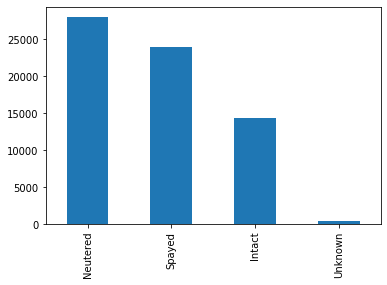

In [3]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [4]:
df.loc[250:260, :]

,Animal_ID,Name,DateTime,MonthYear,Date_of_Birth,Outcome_Type,Outcome_Subtype,Fixed,Sex,Age_numeric,Age_time,Age_month,Breed,Color
250,A809527,*Cricket,12/11/2019 16:17,12/11/2019 16:17,10/18/2019,Adoption,Foster,Spayed,Female,1,month,1.0,Labrador Retriever Mix,Black/White
251,A797472,NaN,06/13/2019 06:59:00 PM,06/13/2019 06:59:00 PM,04/24/2019,Transfer,Partner,Intact,Female,1,month,1.0,Chihuahua Longhair Mix,Black/Tan
252,A742456,*Arrow,02/14/2017 06:27:00 PM,02/14/2017 06:27:00 PM,12/22/2016,Adoption,Foster,Spayed,Female,1,month,1.0,Pit Bull Mix,Brown/Black
253,A721330,*Glen,3/5/2016 17:40,3/5/2016 17:40,1/9/2016,Adoption,Foster,Neutered,Male,1,month,1.0,German Shepherd Mix,Tan
254,A697339,NaN,02/23/2015 06:36:00 PM,02/23/2015 06:36:00 PM,12/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,German Shepherd/Pit Bull,Brown
255,A695918,Clementine,01/29/2015 05:59:00 PM,01/29/2015 05:59:00 PM,11/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,Dachshund/Chihuahua Shorthair,Black/White
256,A809888,NaN,12/4/2019 12:05,12/4/2019 12:05,10/19/2019,Transfer,Partner,Intact,Female,1,month,1.0,Labrador Retriever/German Shepherd,Brown/White
257,A774855,NaN,7/10/2018 19:10,7/10/2018 19:10,05/21/2018,Transfer,Partner,Intact,Male,1,month,1.0,Australian Kelpie Mix,Brown/White
258,A750857,*Cinder,07/28/2017 10:37:00 PM,07/28/2017 10:37:00 PM,6/1/2017,Adoption,Foster,Spayed,Female,1,month,1.0,Great Pyrenees/American Bulldog,Black/White
259,A762939,NaN,11/30/2017 12:00:00 AM,11/30/2017 12:00:00 AM,09/30/2017,Transfer,Partner,Intact,Female,1,month,1.0,Pit Bull Mix,Brown/White


In [5]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [6]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

Animal_ID          0.000000
Name               0.169496
DateTime           0.000000
MonthYear          0.000000
Date_of_Birth      0.000000
Outcome_Type       0.000000
Outcome_Subtype    0.688567
Fixed              0.000015
Sex                0.005673
Age_numeric        0.000000
Age_time           0.000000
Age_month          0.000000
Breed              0.000000
Color              0.000000
dtype: float64

In [7]:
# Drop unnessary columns
df2 = df.drop(columns=['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Date_of_Birth', 'Outcome_Subtype', 
                       'Age_numeric', 'Age_time' , 'Fixed'])

In [8]:
df2.shape
# df2.head()

(66804, 5)

In [9]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.Outcome_Type.notna(), ["Outcome_Type", "Sex", "Age_month", "Breed" ,"Color"]]

In [10]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 5)

In [11]:
# Have to fix the following columns "Sex"
df2 = df2.dropna(axis=0, subset=["Sex"])

In [12]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 5)

In [13]:
# # df2.groupby('Outcome_Type').count()
# df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)

In [14]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.Outcome_Type == "Return to Owner"].index)

In [15]:
# Verify shape
df3.shape

(48025, 5)

In [16]:
# Verify group by counts (Return to Owner should be gone)
df3.groupby('Outcome_Type').count()

,Sex,Age_month,Breed,Color
Outcome_Type,,,,
Adoption,31395,31395,31395,31395
Died,209,209,209,209
Disposal,22,22,22,22
Euthanasia,1694,1694,1694,1694
Missing,29,29,29,29
Rto-Adopt,498,498,498,498
Transfer,14178,14178,14178,14178


In [17]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

Outcome_Type    0.0
Sex             0.0
Age_month       0.0
Breed           0.0
Color           0.0
dtype: float64

In [18]:
df3.shape

(48025, 5)

## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column - As of May 20 9pm, MIX doesn't do anything cause assuming all breeds are mixed.
#### As of May 21 - Creating Kelly's 3 breed categories: 0 = mix, secondary not listed ; 1 = secondary breed listed; 2 = purebred

1. Create new MIX column (Kelly's 3 categories)
2. Split breed into breed_primary and breed_second


#### solution - Creating a Breed_category column AND Split into Breed_primary/Breed_second
* 0 = Breed has the word "Mix"
* 1 = If there are 2 breeds listed
* 2 = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [19]:
# Make a copy and add new column called Breed_category, set all to PURE
df4 = df3.copy()
df4["Breed_category"]= "Pure"
df4.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Pure
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Pure
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Pure
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Pure
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Pure


In [20]:
df4.shape

(48025, 6)

In [21]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category
200,Transfer,Female,0.2,Dachshund,Tan,Pure
201,Transfer,Male,0.2,Dachshund,Tan,Pure
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Pure
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Pure
208,Transfer,Female,0.2,Rat Terrier Mix,White,Pure
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Pure
210,Transfer,Male,0.2,Rat Terrier Mix,White,Pure


In [22]:
# Split Primary and Secondary
df4[['Breed_primary','Breed_second']] = df4.Breed.str.split("/", n=1, expand=True) 

In [23]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Pure,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Pure,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Pure,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Pure,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Pure,Rat Terrier Mix,None


In [24]:
# Find rows containing word "Mix" and set to 0
df4.loc[df4["Breed"].str.contains("Mix"), "Breed_category"] = "Mix"

In [25]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Pure,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Pure,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Pure,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None


In [26]:
# Find rows containing word "/" and set to 1
df4.loc[df4["Breed"].str.contains("\/"), "Breed_category"] = "Two"

In [27]:
df4.loc[200:210, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Two,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Two,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Two,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None


In [28]:
# df4.groupby(['Mix']).count().sort_values("Breed", ascending=False).head(10)
# df4['Breed'].str.count('\/').sum()

In [29]:
# Double checking slashes with isalpha() - About the same number.  Off by 2 
# removing white spaces 
# df4["Breed"]= df4["Breed"].str.replace(" ", "") 
# df4.loc[180:190, :]


In [30]:
# creating bool series with new column 
# df4["bool_series2"]= df4["Breed"].str.isalpha()
# df4.loc[180:190, :]
# df4.groupby(['bool_series2']).count()

In [31]:
# print(f'Pure breed: {48025-34048-8480}')

In [32]:
# # Rename the breed WITHOUT the word MIX
# df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [33]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 371
# Breed_second - 163

# len(df4.Breed_second.value_counts())

In [34]:
# breed_top10primary = [x for x in df4.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
# breed_top10primary

# df4.Breed_primary.value_counts().sort_values(ascending=False).head(15)

In [35]:
# breed_top10second = [x for x in df4.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
# breed_top10second

# df4.Breed_second.value_counts().sort_values(ascending=False).head(10)

#### Handling Color - Selecting colors > 1200
* How does option1 effect RF/LogReg models?


In [36]:
df4.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None


In [37]:
# How many unique color combinations?  - 333
color_counts = df4['Color'].value_counts()
# len(color_counts)
print(df4['Color'].nunique())
color_counts.head(20)

333


Black/White            5911
Tan/White              2695
Brown/White            2655
Black                  2504
White                  2345
Tan                    2231
Tricolor               1957
Black/Tan              1903
Brown                  1877
White/Black            1721
Black/Brown            1645
White/Brown            1549
Brown Brindle/White    1426
Blue/White             1329
White/Tan              1296
Brown/Black            1256
Red                     914
Red/White               876
Tan/Black               788
Brown Brindle           757
Name: Color, dtype: int64

In [38]:
# # Handling "Color" Option 1
color_others = set(color_counts[color_counts < 1200].index)
df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
print(df4['Top_colors'].nunique())

17


In [39]:
df4.head()


,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Top_colors
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None,Others
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None,Black/White
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None,Brown
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None,Others


In [40]:
# # Add new column called Color_new and set to Color
# df5 = df4.copy()
# df5["Color_new"]=df4["Color"]
# df5.head()
# df5.loc[320:330, :]

In [41]:
# Can't do this code here.  It takes COMBI tan/white and changes that to tan!  WRONG!!  I only want tan column


# Find rows containing colors: Gold/Yellow/Tan/Fawn/Buff/Apricot/Cream and set all to YELLOW
# df5.loc[df5["Color"].str.contains('Gold|Yellow|Tan|Fawn|Buff|Apricot|Cream'), "Color_new"] = "Tan"
# df5.loc[264:267, :]

#### Handling Color - Option 2 (Split and have intaker check all colors that apply) - As of May 22, NOT doing color split
* How does option2 effect RF/LogReg models?

In [42]:
# Split Top_color column into color1, color2
# df3[['Color1','Color2']] = df3.Color.str.split("/", n=1, expand=True) 

In [43]:
# df3.loc[150:160, :]

In [44]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df3.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df3.Color1.value_counts())

# How many unique colors in COLOR2? - 34
# len(df3.Color2.value_counts())

In [45]:
# color_top10Color1 = [x for x in df3.Color1.value_counts().sort_values(ascending=False).head(30).index]
# color_top10Color1

# df3.Color1.value_counts().sort_values(ascending=False).head(40)

In [46]:
# color_top10Color2 = [x for x in df3.Color2.value_counts().sort_values(ascending=False).head(10).index]
# color_top10Color2

# df3.Color2.value_counts().sort_values(ascending=False).head(40)

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [47]:
df4['Pet_age_category'] = pd.cut(x=df4['Age_month'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [48]:
df4.loc[50000:50020, :]
df4.tail()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Top_colors,Pet_age_category
66772,Euthanasia,Male,216.0,Miniature Schnauzer Mix,Gray,Mix,Miniature Schnauzer Mix,None,Others,Senior
66774,Adoption,Male,216.0,Chihuahua Longhair Mix,White/Tan,Mix,Chihuahua Longhair Mix,None,White/Tan,Senior
66786,Euthanasia,Female,228.0,Miniature Poodle,White,Pure,Miniature Poodle,None,White,Senior
66787,Transfer,Male,228.0,Chihuahua Shorthair Mix,Brown,Mix,Chihuahua Shorthair Mix,None,Brown,Senior
66790,Euthanasia,Female,228.0,Chihuahua Longhair/Miniature Poodle,White,Two,Chihuahua Longhair,Miniature Poodle,White,Senior


In [49]:
# What's the breakdown by Pet_age_category after binning??
df4.Pet_age_category.value_counts().sort_values(ascending=False).head(10)

Young     22342
Baby      13355
Adult      9249
Senior     3077
Name: Pet_age_category, dtype: int64

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [50]:
# Create new BINARY_OUTCOME column and set to 0

df4["Binary_outcome"]=0
df4.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Top_colors,Pet_age_category,Binary_outcome
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None,Others,Baby,0
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown,Baby,0
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None,Black/White,Baby,0
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None,Brown,Baby,0
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None,Others,Baby,0


In [51]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df4.loc[df4["Outcome_Type"].str.contains("Adoption"), "Binary_outcome"] = 1

In [52]:
df4.loc[200:300, :]

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Top_colors,Pet_age_category,Binary_outcome
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None,Tan,Baby,0
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None,Tan,Baby,0
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Two,German Shepherd,Rottweiler,Brown/Black,Baby,0
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Two,Labrador Retriever,Pit Bull,Others,Baby,0
208,Transfer,Female,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None,White,Baby,0
...,...,...,...,...,...,...,...,...,...,...,...
296,Transfer,Female,1.0,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown,Baby,0
297,Transfer,Male,1.0,Australian Cattle Dog Mix,Cream/Brown Merle,Mix,Australian Cattle Dog Mix,None,Others,Baby,0
298,Adoption,Female,1.0,Labrador Retriever Mix,Tan,Mix,Labrador Retriever Mix,None,Tan,Baby,1
299,Transfer,Male,1.0,Jack Russell Terrier Mix,Sable,Mix,Jack Russell Terrier Mix,None,Others,Baby,0


## OneHot Encoding

In [53]:
df4.head()

,Outcome_Type,Sex,Age_month,Breed,Color,Breed_category,Breed_primary,Breed_second,Top_colors,Pet_age_category,Binary_outcome
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None,Others,Baby,1
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown,Baby,0
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None,Black/White,Baby,0
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None,Brown,Baby,0
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None,Others,Baby,0


In [54]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2

df5 = df4.drop(columns=['Outcome_Type','Age_month', 'Breed', 'Color','Breed_second' ])

In [55]:
# Check null values

df5.apply(lambda x: sum(x.isnull()/len(df5)))

Sex                 0.000000
Breed_category      0.000000
Breed_primary       0.000000
Top_colors          0.000000
Pet_age_category    0.000042
Binary_outcome      0.000000
dtype: float64

In [56]:
# Fixing issues by dropping rows with null values
df5 = df5.dropna(axis=0, subset=["Pet_age_category"])

In [57]:

df5.apply(lambda x: sum(x.isnull()/len(df5)))

Sex                 0.0
Breed_category      0.0
Breed_primary       0.0
Top_colors          0.0
Pet_age_category    0.0
Binary_outcome      0.0
dtype: float64

In [58]:
df5.head()

,Sex,Breed_category,Breed_primary,Top_colors,Pet_age_category,Binary_outcome
0,Female,Mix,Border Collie Mix,Others,Baby,1
1,Male,Mix,German Shepherd Mix,Brown,Baby,0
2,Male,Mix,Labrador Retriever Mix,Black/White,Baby,0
4,Female,Mix,Dachshund Mix,Brown,Baby,0
6,Female,Mix,Pit Bull Mix,Others,Baby,0


In [68]:
#  encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [69]:
X = df5.drop(['Binary_outcome' ], axis='columns')

In [70]:
X.head()

,Sex,Breed_category,Breed_primary,Top_colors,Pet_age_category
0,Female,Mix,Border Collie Mix,Others,Baby
1,Male,Mix,German Shepherd Mix,Brown,Baby
2,Male,Mix,Labrador Retriever Mix,Black/White,Baby
4,Female,Mix,Dachshund Mix,Brown,Baby
6,Female,Mix,Pit Bull Mix,Others,Baby


In [71]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

In [72]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Breed_category','Breed_primary', 'Pet_age_category','Top_colors']),
    remainder='passthrough')

In [93]:
X = column_trans.fit_transform(X)

In [94]:
y = ohe.fit_transform(df5[['Binary_outcome']])
print(y)


[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Neural Network

In [95]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [97]:
 X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [104]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=397))
# model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [105]:
 # Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               39800     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 40,002
Trainable params: 40,002
Non-trainable params: 0
_________________________________________________________________


In [111]:
X_train.shape
X_train = X_train.toarray()

In [112]:
y_train.shape

(36017, 2)

In [113]:
 model.fit(
    X_train,
    y_train,
    epochs=60,
    shuffle=True
)

Train on 36017 samples
Epoch 1/60
36017/36017 [==============================] - 3s 94us/sample - loss: 0.6332 - accuracy: 0.6590
Epoch 2/60
36017/36017 [==============================] - 3s 78us/sample - loss: 0.6228 - accuracy: 0.6671
Epoch 3/60
36017/36017 [==============================] - 3s 78us/sample - loss: 0.6164 - accuracy: 0.6732
Epoch 4/60
36017/36017 [==============================] - 3s 84us/sample - loss: 0.6110 - accuracy: 0.6764
Epoch 5/60
36017/36017 [==============================] - 3s 88us/sample - loss: 0.6051 - accuracy: 0.6815
Epoch 6/60
36017/36017 [==============================] - 3s 86us/sample - loss: 0.5997 - accuracy: 0.6852
Epoch 7/60
36017/36017 [==============================] - 3s 80us/sample - loss: 0.5947 - accuracy: 0.6884
Epoch 8/60
36017/36017 [==============================] - 3s 81us/sample - loss: 0.5904 - accuracy: 0.6914
Epoch 9/60
36017/36017 [==============================] - 3s 80us/sample - loss: 0.5864 - accuracy: 0.6928
Epoch 10/60
36

#### Quantify model with 1 layer

In [116]:
X_test = X_test.toarray()


In [117]:

model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

12006/12006 - 1s - loss: 0.7613 - accuracy: 0.6407
Normal Neural Network - Loss: 0.7613235694278225, Accuracy: 0.640679657459259


#### Adding 2nd layer

In [119]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=397))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

 # Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
 model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               39800     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 202       
Total params: 50,102
Trainable params: 50,102
Non-trainable params: 0
_________________________________________________________________


In [121]:
 model.fit(
    X_train,
    y_train,
    epochs=60,
    shuffle=True
)

Train on 36017 samples
Epoch 1/60
36017/36017 [==============================] - 4s 107us/sample - loss: 0.6336 - accuracy: 0.6605
Epoch 2/60
36017/36017 [==============================] - 4s 101us/sample - loss: 0.6221 - accuracy: 0.6681
Epoch 3/60
36017/36017 [==============================] - 3s 97us/sample - loss: 0.6144 - accuracy: 0.6743
Epoch 4/60
36017/36017 [==============================] - 3s 94us/sample - loss: 0.6074 - accuracy: 0.6799
Epoch 5/60
36017/36017 [==============================] - 3s 93us/sample - loss: 0.6005 - accuracy: 0.6837
Epoch 6/60
36017/36017 [==============================] - 3s 92us/sample - loss: 0.5930 - accuracy: 0.6885
Epoch 7/60
36017/36017 [==============================] - 3s 88us/sample - loss: 0.5864 - accuracy: 0.6946
Epoch 8/60
36017/36017 [==============================] - 3s 93us/sample - loss: 0.5795 - accuracy: 0.6983
Epoch 9/60
36017/36017 [==============================] - 4s 98us/sample - loss: 0.5733 - accuracy: 0.7019
Epoch 10/60


#### Adding 3rd layer

In [122]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=397))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

 # Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
 model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               39800     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 202       
Total params: 60,202
Trainable params: 60,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 model.fit(
    X_train,
    y_train,
    epochs=60,
    shuffle=True
)

Train on 36017 samples
Epoch 1/60
36017/36017 [==============================] - 4s 120us/sample - loss: 0.6339 - accuracy: 0.6597
Epoch 2/60
36017/36017 [==============================] - 4s 117us/sample - loss: 0.6225 - accuracy: 0.6680
Epoch 3/60
36017/36017 [==============================] - 4s 112us/sample - loss: 0.6153 - accuracy: 0.6731
Epoch 4/60
36017/36017 [==============================] - 4s 101us/sample - loss: 0.6092 - accuracy: 0.6784
Epoch 5/60
36017/36017 [==============================] - 4s 109us/sample - loss: 0.6020 - accuracy: 0.6832
Epoch 6/60
36017/36017 [==============================] - 4s 110us/sample - loss: 0.5951 - accuracy: 0.6891
Epoch 7/60
36017/36017 [==============================] - 3s 90us/sample - loss: 0.5875 - accuracy: 0.6940
Epoch 8/60
36017/36017 [==============================] - 3s 96us/sample - loss: 0.5802 - accuracy: 0.6971
Epoch 9/60
36017/36017 [==============================] - 3s 87us/sample - loss: 0.5728 - accuracy: 0.7021
Epoch 10